In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Imports

In [2]:
import numpy as np
import pandas as pd
from fastai.vision import *

In [3]:
from pathlib import Path

## Config

In [4]:
path = Path('../data')
path_img = path/'train_images'
path_train_csv = path/'train.csv'

In [5]:
bs = 16

## Data

In [ ]:
train_df = pd.read_csv(path_train_csv)

In [ ]:
train_df.head()

In [ ]:
d = train_df.set_index('id_code').to_dict()['diagnosis']

In [ ]:
src = (ImageList.from_df(train_df, path, ['id_code'], folder='train_images', suffix='.png')
       .split_by_rand_pct(0.2)
      .label_from_func(lambda i: d[Path(i).stem]))

In [ ]:
data = src.transform(size=128, resize_method=2).databunch().normalize(imagenet_stats)

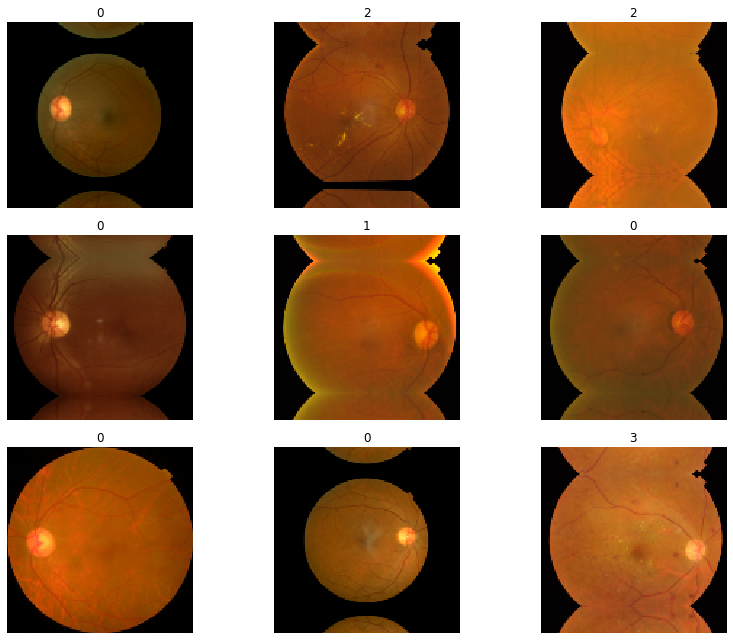

In [7]:
data.show_batch(rows=3, figsize=(12,9))

In [ ]:
data.save('image_data.pkl')

In [6]:
data = load_data(path, file='image_data.pkl')

In [8]:
arch = models.resnet50

In [20]:
kappa = KappaScore()
kappa.weights = "quadratic"
learn = cnn_learner(data, arch, metrics=kappa, ps=0.7)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


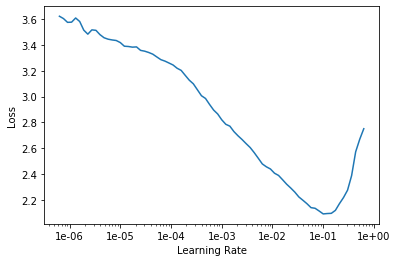

In [21]:
learn.lr_find()
learn.recorder.plot()

In [22]:
lr = 1E-2

In [23]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,kappa_score,time
0,1.588352,0.969337,0.772645,01:43
1,1.049393,0.830958,0.797305,01:43
2,0.851684,0.794136,0.784732,01:44
3,0.643508,0.672299,0.804021,01:43
4,0.497628,0.712004,0.807130,01:46


In [24]:
learn.save('stage-1-rn50')

In [ ]:
learn.load('stage-1-rn50')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

In [ ]:
learn.save('stage-2-rn50')

In [25]:
learn.export()

In [26]:
test_src = ImageList.from_folder(path/'test_images')

In [27]:
learn = load_learner(path, test=test_src)

In [28]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [29]:
preds.mean()

tensor(0.2000)